In [1]:
%env PYDEVD_DISABLE_FILE_VALIDATION=1

env: PYDEVD_DISABLE_FILE_VALIDATION=1


# Module Importation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import HTML
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Ex Data Analysis

In [3]:
# Load the dataset 
df = pd.read_csv("dataset.csv")

# Convert DataFrame to HTML table
data = df.head().to_html(index=False)

Average_income = df['Total_income'].mean()
print(Average_income)
# Display HTML table to get an overview of the data we are going to work with
display(HTML(data))



181228.19456174684


ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [4]:
# Lets now check the size of our dataset.
print(df.shape) #--------> around 9709 rows and 20 coulmns ( our features for ML model)

(9709, 20)


In [5]:
# Data Cleaning
# Null values

Null = df.isnull().sum()

# Check if there are any null values in the DataFrame
if Null.sum() == 0:
    print("No Null")
else:
    print(Null)  # Uncomment this line if you want to print the null values for each column


No Null


In [6]:
df.describe()


,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [7]:
# # Frequency distributions for categorical variables
# categorical_vars = ['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed', 'Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']
# for var in categorical_vars:
#     print(df[var].value_counts())

# Data Visualization

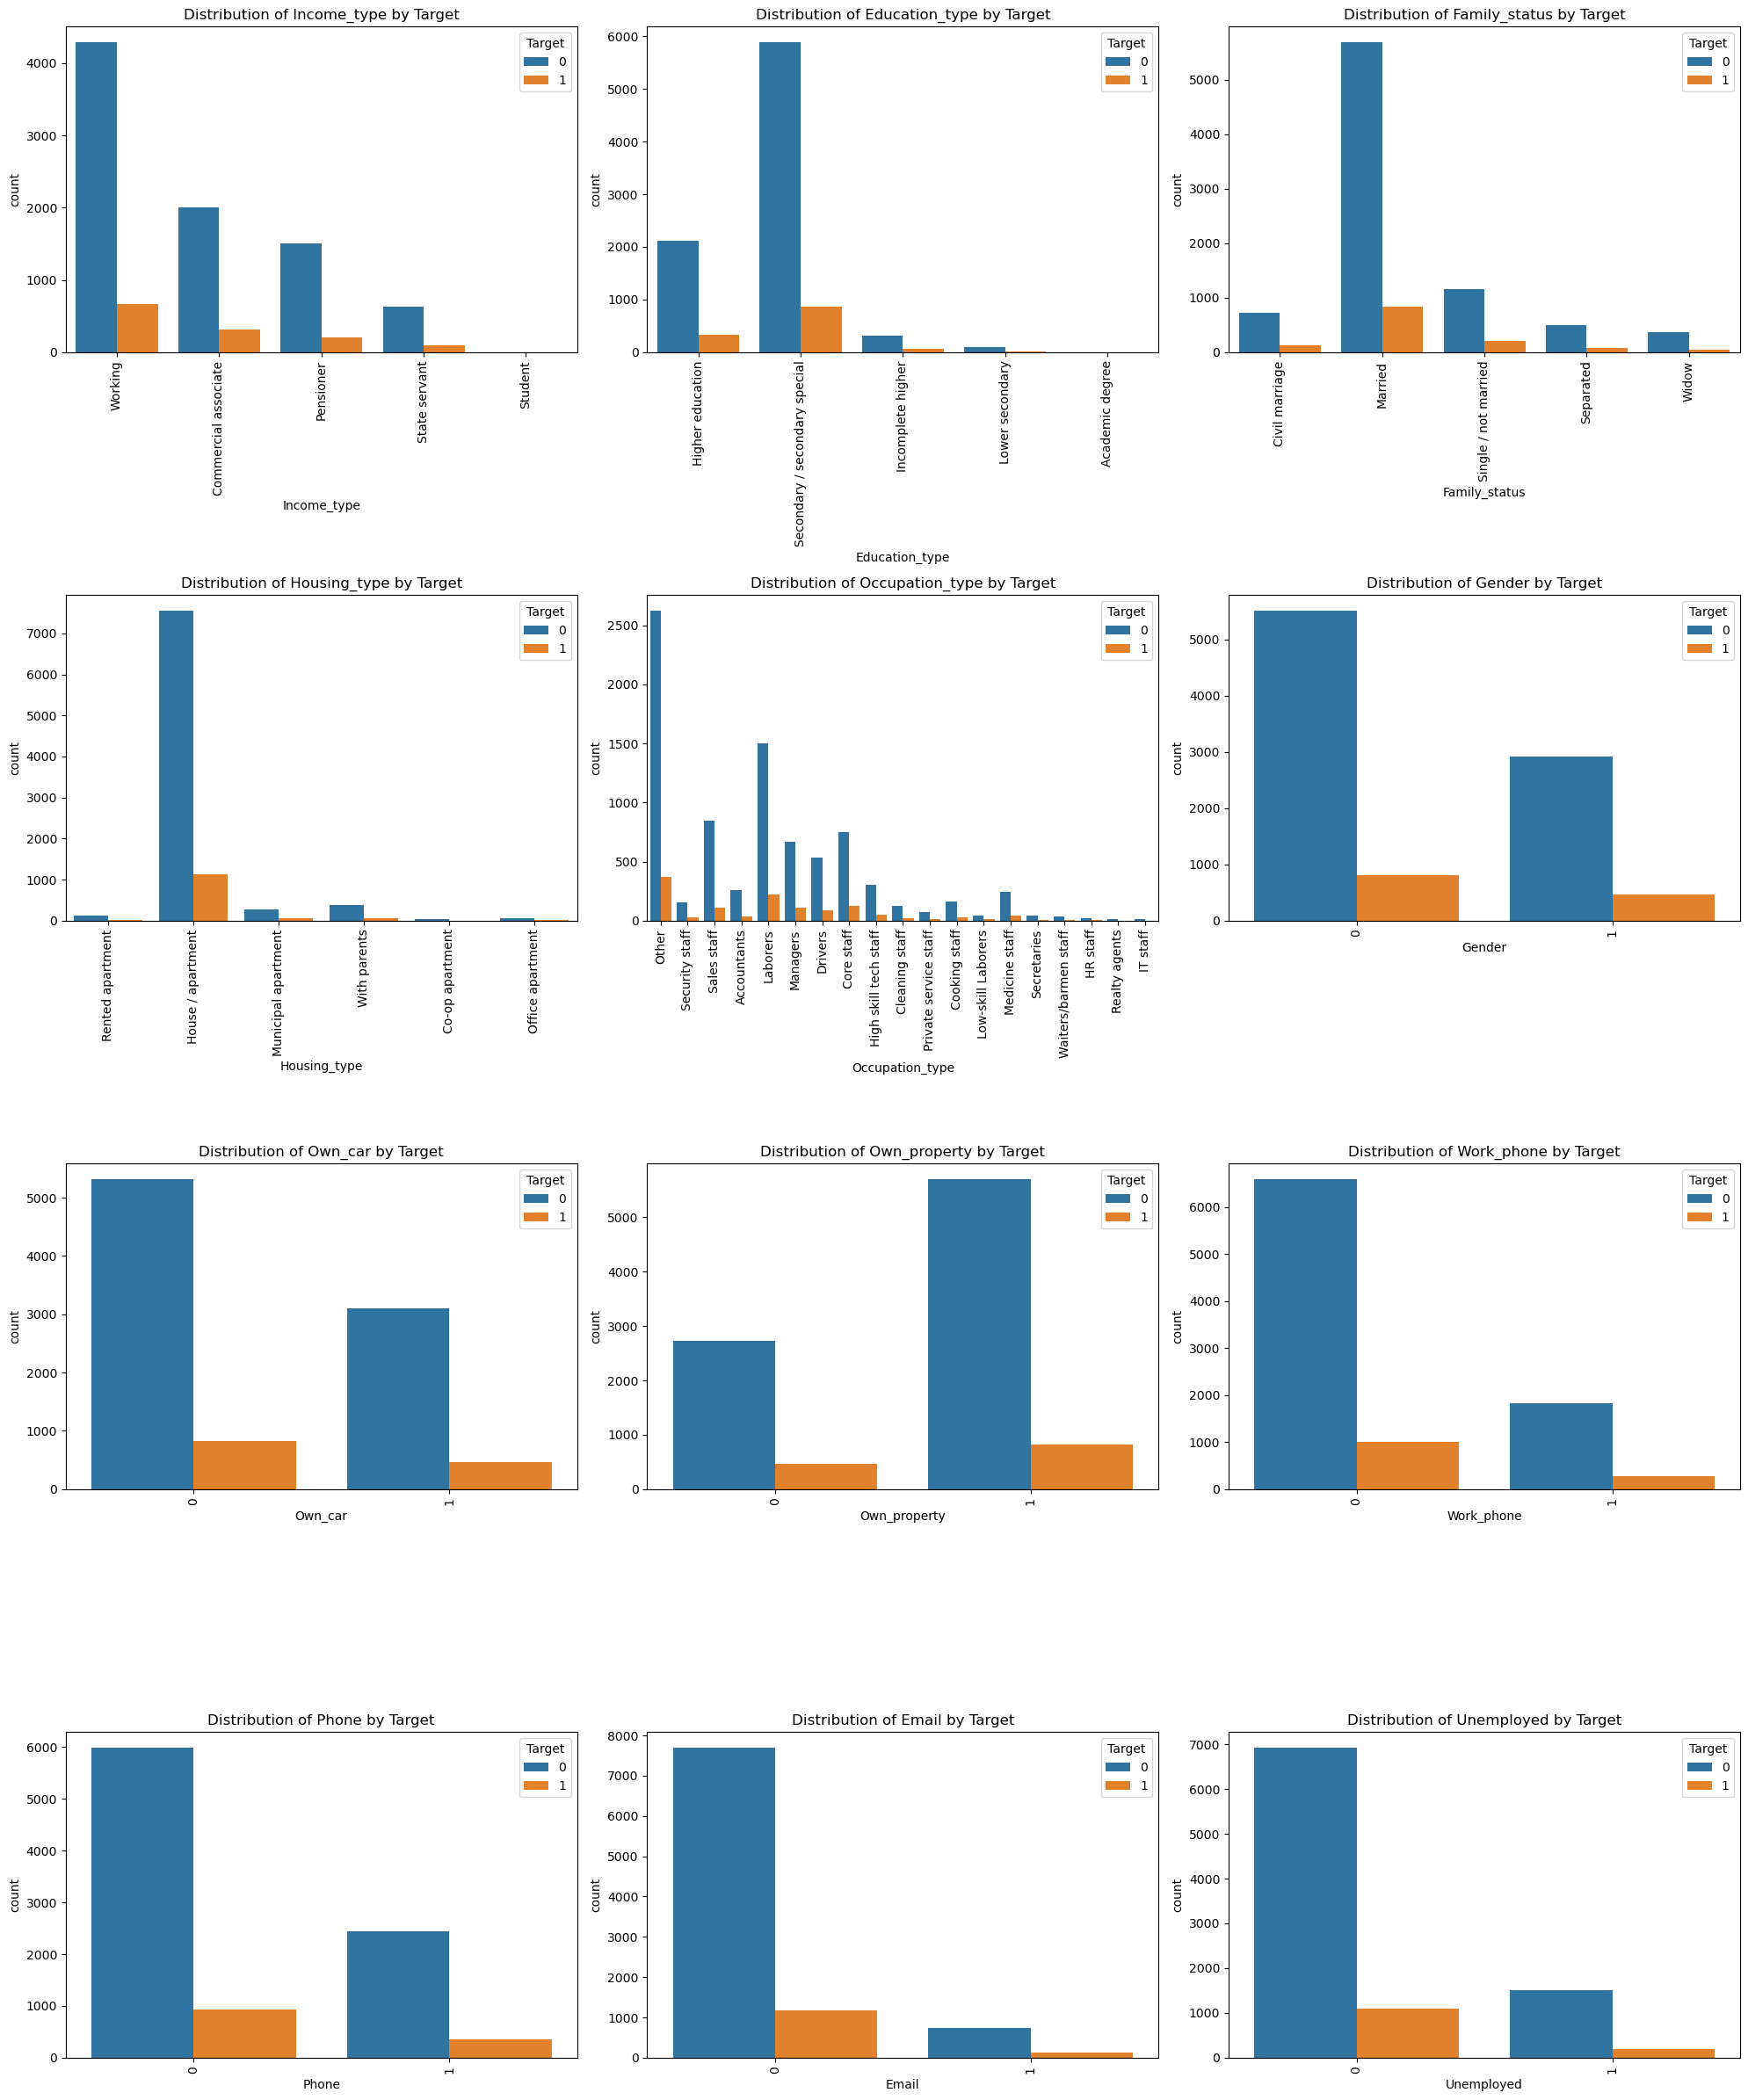

In [8]:
# Plotting bar graphs for categorical variable for better view and understanding
# Identify categorical variables
categorical_vars = ['Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type', 'Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed']

# Number of variables to plot
num_vars = len(categorical_vars)
# print(num_vars) #--------> we have 12 categorical variables to plot

# Define the number of rows and columns for the subplots grid
ncols = 3
nrows = (num_vars // ncols) + (1 if num_vars % ncols != 0 else 0)

# Create the figure and axes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 6))
axes = axes.flatten()

# Plot each categorical variable in a subplot
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=df, hue='Target', ax=axes[i])
    axes[i].set_title(f'Distribution of {var} by Target')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


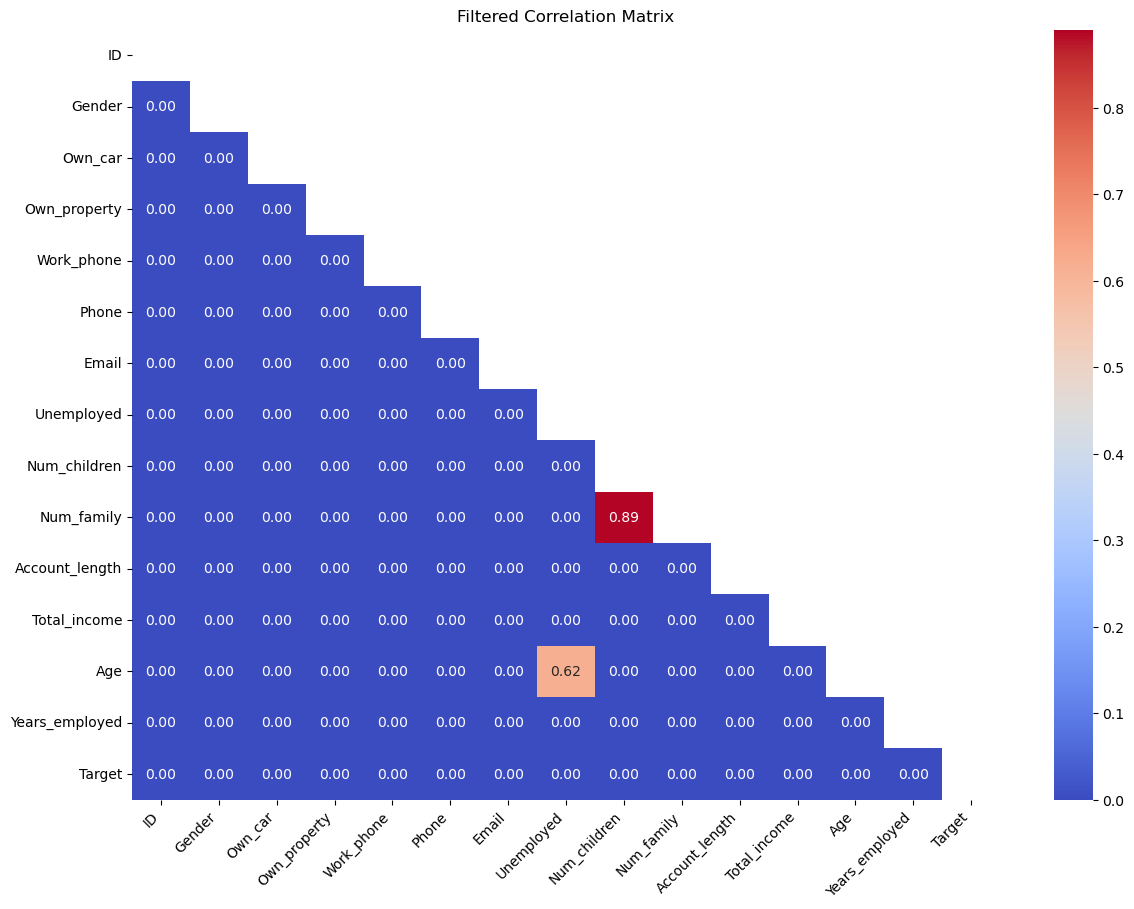

In [9]:
def filter_correlations(corr_matrix, threshold=0.5):
    mask = np.abs(corr_matrix) >= threshold
    filtered_corr = corr_matrix[mask].fillna(0)
    return filtered_corr

def plot_heatmap(matrix, title, size=(14, 10)):
    mask = np.triu(np.ones_like(matrix, dtype=bool))  # Create a mask for the upper triangle
    plt.figure(figsize=size)
    sns.heatmap(matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.title(title)
    plt.show()

# Select only the numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Filter the correlation matrix to only show high correlations
filtered_corr_matrix = filter_correlations(corr_matrix, threshold=0.5)

# Plot heatmap with the upper triangle masked
plot_heatmap(filtered_corr_matrix, 'Filtered Correlation Matrix')


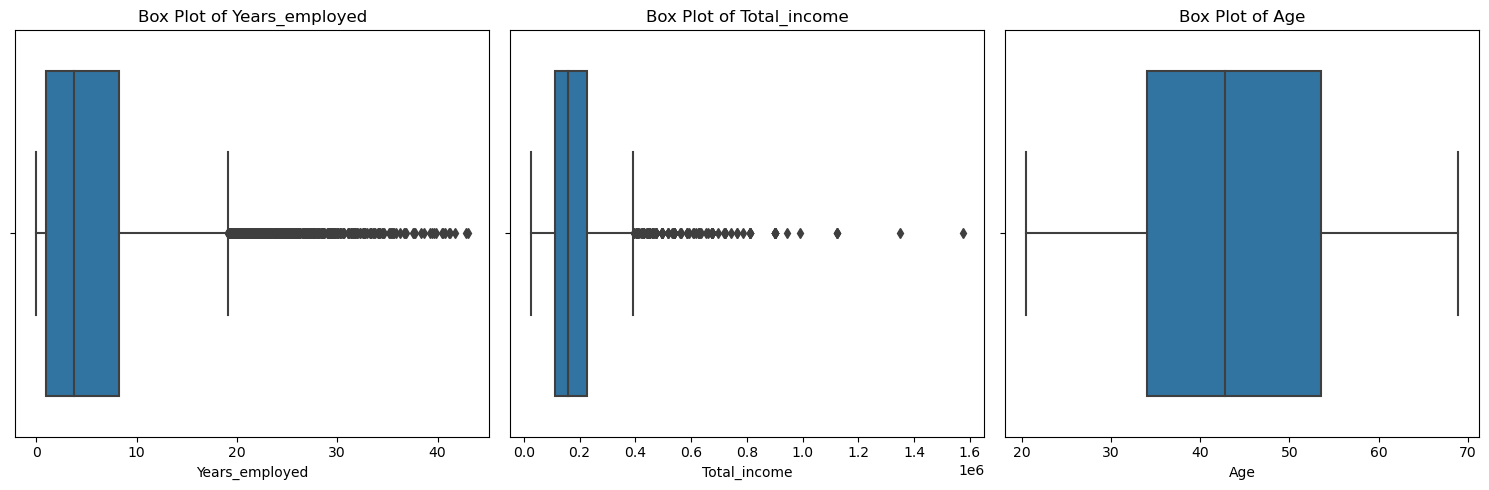

In [10]:
# using box plot visualizations to detect outliers
# Box plot for 'Years_employed'
# List of columns for which we want to create box plots
columns_to_plot = ['Years_employed', 'Total_income', 'Age']

# Number of columns
num_columns = len(columns_to_plot)

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, num_columns, figsize=(15, 5))

# Create a box plot for each column
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i], orient='h')
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Data Cleaning: Handling outliers

In [11]:
# Calculating outliers using Q1 and Q3
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Total_income'].quantile(0.25)
Q3 = df['Total_income'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Total_income'] < lower_bound) | (df['Total_income'] > upper_bound)]
print(outliers.sum())

# # Print outliers
# data = outliers.head(5).to_html(index=True)
# display(HTML(data))

ID                                                        1614364698
Gender                                                           166
Own_car                                                          205
Own_property                                                     223
Work_phone                                                        68
Phone                                                            124
Email                                                             53
Unemployed                                                        26
Num_children                                                     165
Num_family                                                       737
Account_length                                                  9008
Total_income                                             166403173.5
Age                                                     14276.495753
Years_employed                                           2113.836698
Income_type        WorkingCommerci

In [12]:
# # Calculate the 95th percentile of the Total_income column
# percentile_95 = np.percentile(df['Total_income'], 95)

# # Count the number of values above the 95th percentile
# num_above_95 = np.sum(df['Total_income'] > percentile_95)
# print(num_above_95)
# # Calculate the total number of values
# total_values = len(df['Total_income'])

# # Calculate the percentage of values above the 95th percentile
# percentage_above_95 = (num_above_95 / total_values) * 100

# print(f'Percentage of values in Total_income above the 95th percentile: {percentage_above_95:.2f}%')


In [13]:
# # Calculate the 95th percentile of the Num_family column
# percentile_95 = np.percentile(df['Num_family'], 95)

# # Count the number of values above the 95th percentile
# num_above_95 = np.sum(df['Num_family'] > percentile_95)
# print(num_above_95)
# # Calculate the total number of values
# total_values = len(df['Num_family'])

# # Calculate the percentage of values above the 95th percentile
# percentage_above_95 = (num_above_95 / total_values) * 100

# print(f'Percentage of values in Num_family above the 95th percentile: {percentage_above_95:.2f}%')


In [14]:
# Calculate the 95th percentile for Total_income and Num_family
percentile_95_income = np.percentile(df['Total_income'], 95)
percentile_95_family = np.percentile(df['Num_family'], 95)

# Identify rows to drop (both conditions must be met)
rows_to_drop = df[(df['Total_income'] > percentile_95_income) & (df['Num_family'] > percentile_95_family)]

# Calculate the number of rows to drop
num_rows_to_drop = len(rows_to_drop)

# Calculate the total number of rows
total_rows = len(df)

# Calculate the percentage of rows to be dropped
percentage_dropped = (num_rows_to_drop / total_rows) * 100

# Drop the rows from the dataframe
df_cleaned = df.drop(rows_to_drop.index)

print(f'Number of rows dropped: {num_rows_to_drop}')
print(f'Percentage of rows dropped: {percentage_dropped:.2f}%')

Number of rows dropped: 8
Percentage of rows dropped: 0.08%


In [15]:
# # summay stats for Income column
# Average_income = df['Total_income'].mean().round(0)
# print("Average income is ",Average_income)
# max_income = df['Total_income'].max()
# print("max_income is ",max_income)
# min_income = df['Total_income'].min()
# print("min_income is ",min_income)

# # summay stats for children column
# max_children = df['Num_children'].max()
# print("most no: of children per family is ",max_children)
# min_children = df['Num_children'].min()
# print("least no of children in a family is ",min_children)

# # for x in df['Num_children']:
# #     if x > 5:
# #         print(x)

# # Round 'Age' and 'Years_employed' columns to remove the decimals
# df[['Age', 'Years_employed']] = df[['Age', 'Years_employed']].round(0)

# # Convert DataFrame to HTML table and display the updated dataframe
# data = df.head(3).to_html(index=False)
# display(HTML(data))


In [ ]:
# cleaned dataset
# summay stats for Income column
Average_income = df_cleaned['Total_income'].mean().round(0)
print("Average income is ",Average_income)
max_income = df_cleaned['Total_income'].max()
print("max_income is ",max_income)
min_income = df_cleaned['Total_income'].min()
print("min_income is ",min_income)

# summay stats for children column
max_children = df_cleaned['Num_children'].max()
print("most no: of children per family is ",max_children)
min_children = df_cleaned['Num_children'].min()
print("least no of children in a family is ",min_children)

# for x in df['Num_children']:
#     if x > 5:
#         print(x)

# Round 'Age' and 'Years_employed' columns to remove the decimals
df_cleaned[['Age', 'Years_employed']] = df_cleaned[['Age', 'Years_employed']].round(0)

# Convert DataFrame to HTML table and display the updated dataframe
data = df_cleaned.head(3).to_html(index=False)
display(HTML(data))


# Feature Engineering

In [17]:
# feature engineering
df_cleaned['Income_per_family_member'] = df_cleaned['Total_income'] / df_cleaned['Num_family']
print("Maximum Income per family member is",df_cleaned['Income_per_family_member'].max())
print("Minimum Income per family member is",df_cleaned['Income_per_family_member'].min())

# Convert DataFrame to HTML table and display the updated dataframe
data = df_cleaned.head(3).to_html(index=False)
display(HTML(data))



Maximum Income per family member is 900000.0
Minimum Income per family member is 5625.0


ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target,Income_per_family_member
5008804,1,1,1,1,0,0,0,0,2,15,427500.0,33.0,12.0,Working,Higher education,Civil marriage,Rented apartment,Other,1,213750.0
5008806,1,1,1,0,0,0,0,0,2,29,112500.0,59.0,3.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,0,56250.0
5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.0,8.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,270000.0


In [18]:
# Split the data into features (X) and target (y)
X = df_cleaned.drop(['ID', 'Target'], axis=1)
y = df_cleaned['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Building, Training, Evaluation, and Saving

In [ ]:
# import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Identify categorical and numerical variables
categorical_vars = ['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed', 'Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']
numerical_vars = ['Num_children', 'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed', 'Income_per_family_member']

# Define target variable
X = df_cleaned[categorical_vars + numerical_vars]
y = df_cleaned['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ColumnTransformer with OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_vars)
    ],
    remainder='passthrough'  # This will keep the numerical variables as they are
)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate models using all features
print("Training on all features:")
for name, model in models.items():
    if name == 'K-Nearest Neighbors':
        # Ensure data is in the correct format for KNN
        X_train_array = preprocessor.fit_transform(X_train)
        X_test_array = preprocessor.transform(X_test)
        model.fit(X_train_array, y_train)
        y_pred = model.predict(X_test_array)
    else:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')
    
    # Define pipeline with preprocessor and model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    
   # Save model
    filename = f'{name}_model.joblib'
    joblib.dump(model_pipeline, filename)
    print(f"Saved {name} model to {filename}")
# Example of training a model for 3 minutes (commented out)
# accuracy, trained_model = train_for_limited_time(models['Logistic Regression'], X_train, y_train, X_test, y_test, time_limit=180)
# print(f'Logistic Regression Accuracy after 3 minutes: {accuracy:.4f}')
# joblib.dump(trained_model, 'logistic_regression_model_3min.joblib')
